# check dataloader

In [1]:
import os

import numpy as np
import pandas as pd
from pandarallel import pandarallel
import matplotlib.pyplot as plt


In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import sys

sys.path.append("/kaggle/src/data/")
from dss_dataloader import DSSAddRolldiffDataset


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [4]:
series_df = pd.read_parquet("/kaggle/input/preprocessed_train_series_le.parquet")
key_df = series_df[["series_date_key", "series_date_key_str"]].drop_duplicates()
key_df["series_id"], key_df["date"] = (
    key_df["series_date_key_str"].str.split("_", 1).str
)
key_df = key_df.drop(columns=["series_date_key_str"], axis=1)

/tmp/ipykernel_145080/3121992024.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  key_df["series_date_key_str"].str.split("_", 1).str
/tmp/ipykernel_145080/3121992024.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  key_df["series_id"], key_df["date"] = (


7703
0


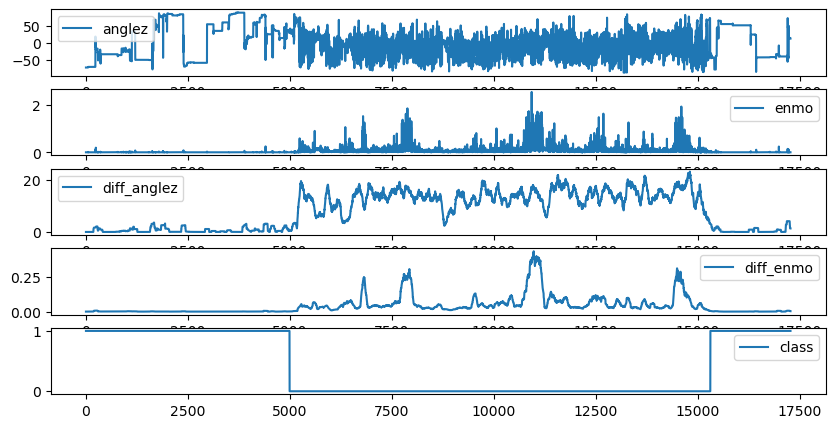

1


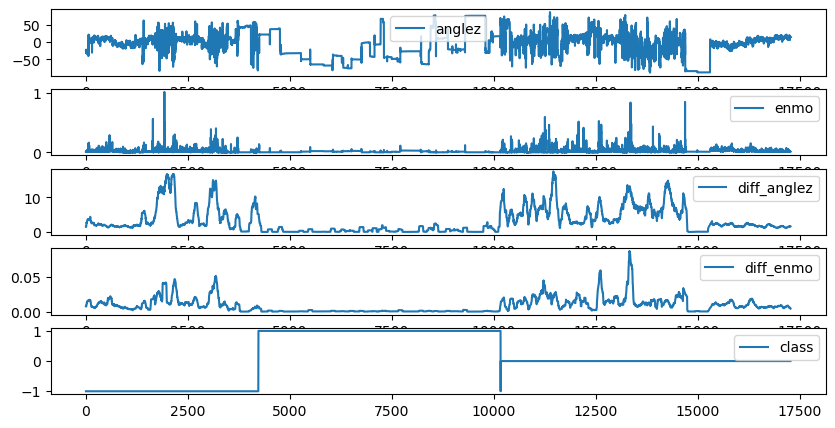

2
CPU times: user 4.21 s, sys: 3.69 s, total: 7.9 s
Wall time: 29.4 s


In [5]:
%%time

dataset = DSSAddRolldiffDataset(key_df, series_df)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())
print(len(dataset))
show_idx = 1
for idx, (input, target, input_info) in enumerate(dataloader):
    print(idx)
    # if idx < show_idx:
    #     continue
    if idx > show_idx:
        break
    plt.figure(figsize=(10, 5))
    plt.subplot(5, 1, 1)
    plt.plot(input[0, 0, :].numpy(), label="anglez")
    plt.legend()
    plt.subplot(5, 1, 2)
    plt.plot(input[0, 1, :].numpy(), label="enmo")
    plt.legend()
    plt.subplot(5, 1, 3)
    plt.plot(input[0, 2, :].numpy(), label="diff_anglez")
    plt.legend()
    plt.subplot(5, 1, 4)
    plt.plot(input[0, 3, :].numpy(), label="diff_enmo")
    plt.legend()
    plt.subplot(5, 1, 5)
    plt.plot(target[0, 0, :].numpy(), label="class")
    plt.legend()
    plt.show()
    